Exercise 2 ATS - Shai Gury , Max Romanov , Noy Buganim

In HW 2 you need to create a prototype implementation of quantile forecaster from the HW 1 paper. This implementation does not need to be production-grade, but it must contain all the main moving parts of the model. The grading scheme is the same as in HW 1.


In [ ]:
!rm -rf MQRNN/
!git clone  https://github.com/tianchen101/MQRNN.git

Cloning into 'MQRNN'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 78 (delta 35), reused 58 (delta 20), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip'
!unzip 'LD2011_2014.txt.zip'

--2022-06-10 20:06:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00321/LD2011_2014.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261335609 (249M) [application/x-httpd-php]
Saving to: ‘LD2011_2014.txt.zip’

LD2011_2014.txt.zip 100%[===================>] 249.23M  82.5MB/s    in 3.0s    

2022-06-10 20:06:35 (82.5 MB/s) - ‘LD2011_2014.txt.zip’ saved [261335609/261335609]

Archive:  LD2011_2014.txt.zip
  inflating: LD2011_2014.txt         
   creating: __MACOSX/
  inflating: __MACOSX/._LD2011_2014.txt  


In [ ]:
import numpy as np
import pandas as pd
# load all data
dataset = pd.read_csv('/content/LD2011_2014.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0]}, index_col=['datetime'])

In [ ]:
dataset.replace('?', np.nan, inplace=True)
dataset.index = pd.to_datetime(dataset.index)
dataset.sort_index(inplace=True)

In [ ]:
dataset=dataset.astype('object')

In [ ]:
dt = dataset[['MT_010' ,'MT_014' , 'MT_006' , 'MT_004' , 'MT_005']].apply(lambda x: x.str.replace(',','.'))

In [ ]:
dt = dt['2012-01-01':].astype('float64')


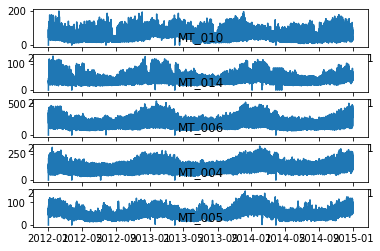

In [ ]:
from matplotlib import pyplot
# line plot for each variable
pyplot.figure()
for i in range(len(dt.columns)):
	pyplot.subplot(len(dt.columns), 1, i+1)
	name = dt.columns[i]
	pyplot.plot(dt[name])
	pyplot.title(name, y=0)
pyplot.show()

In [ ]:
from MQRNN import Encoder
from MQRNN import Decoder
from MQRNN.MQRNN import MQRNN 
from MQRNN.data import MQRNN_dataset,read_df

In [ ]:
config = {
    'horizon_size':40,
    'hidden_size':50,
    'quantiles': [0.1, 0.25 , 0.5 , 0.75 , 0.9], 
    'columns': [1],
    'dropout': 0.3,
    'layer_size':2,
    'by_direction':False,
    'lr': 1e-3,
    'batch_size': 1,
    'num_epochs':500,
    'context_size': 10,
}

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
x = pd.DataFrame(index =dt.index , data= {'hour':dt.index.hour ,
                                           'dayofweek':dt.index.dayofweek ,
                                           'month':dt.index.month ,
                                            'minute':dt.index.minute ,
                                
                                          
                                           })

In [ ]:
y = dt

In [ ]:
horizon = 40

In [ ]:
train_y=y.iloc[:-horizon]
test_y=y.iloc[-horizon:]
train_x = x.iloc[:-horizon , :]
test_x = x.iloc[-horizon: , :]
train_x =train_x.iloc[-1000:,:]
train_y =train_y.iloc[-1000:]



In [ ]:
from MQRNN.data import MQRNN_dataset
dset = MQRNN_dataset(train_y,train_x,40,1 )

self.covariate_df.shape[0] : 1000
full_covariate shape: (960, 1, 40, 4)


In [ ]:
config['covariate_size'] = train_x.shape[1]
config['device'] = device
config 

{'batch_size': 1,
 'by_direction': False,
 'columns': [1],
 'context_size': 10,
 'covariate_size': 4,
 'device': device(type='cuda', index=0),
 'dropout': 0.3,
 'hidden_size': 50,
 'horizon_size': 40,
 'layer_size': 2,
 'lr': 0.001,
 'num_epochs': 500,
 'quantiles': [0.1, 0.25, 0.5, 0.75, 0.9]}

In [ ]:
import torch 
horizon_size = config['horizon_size']
hidden_size = config['hidden_size']
quantiles = config['quantiles']
quantile_size = len(quantiles)
columns = config['columns']
dropout = config['dropout']
layer_size = config['layer_size']
by_direction = config['by_direction']
lr = config['lr']
batch_size= config['batch_size']
num_epochs = config['num_epochs']
context_size = config['context_size']
covariate_size = config['covariate_size']
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
net = MQRNN(horizon_size,hidden_size,quantiles,columns,dropout,layer_size,by_direction,lr,batch_size,num_epochs,context_size,covariate_size,device)

device is: cuda:0


In [ ]:
train_dataset = MQRNN_dataset(train_y,train_x,horizon_size,quantile_size)

self.covariate_df.shape[0] : 1000
full_covariate shape: (960, 1, 40, 4)


In [ ]:
train_dataset.covariate_df

,hour,dayofweek,month,minute
datetime,,,,
2014-12-21 04:15:00,4,6,12,15
2014-12-21 04:30:00,4,6,12,30
2014-12-21 04:45:00,4,6,12,45
2014-12-21 05:00:00,5,6,12,0
2014-12-21 05:15:00,5,6,12,15
...,...,...,...,...
2014-12-31 13:00:00,13,2,12,0
2014-12-31 13:15:00,13,2,12,15
2014-12-31 13:30:00,13,2,12,30


In [ ]:
net.train(train_dataset)

epoch_num 5, current loss is: 34.50675065104166
epoch_num 10, current loss is: 35.661959635416665
epoch_num 15, current loss is: 30.922906901041667
epoch_num 20, current loss is: 27.054153645833335
epoch_num 25, current loss is: 24.531297526041666
epoch_num 30, current loss is: 20.637125651041668
epoch_num 35, current loss is: 26.86653515625
epoch_num 40, current loss is: 21.056201822916666
epoch_num 45, current loss is: 23.787327962239583
epoch_num 50, current loss is: 23.965443196614583
epoch_num 55, current loss is: 21.423660319010416
epoch_num 60, current loss is: 25.521264485677083
epoch_num 65, current loss is: 26.649044270833333
epoch_num 70, current loss is: 21.75265673828125
epoch_num 75, current loss is: 21.312000325520835
epoch_num 80, current loss is: 23.185146158854167
epoch_num 85, current loss is: 24.951221028645833
epoch_num 90, current loss is: 24.141365397135417
epoch_num 95, current loss is: 21.290177734375
epoch_num 100, current loss is: 19.65275830078125
epoch_num 

input_target_covariate_tensor shape: torch.Size([1000, 1, 5])
hidden shape: torch.Size([1, 1, 50])
next_covariate_tensor: torch.Size([1, 1, 160])


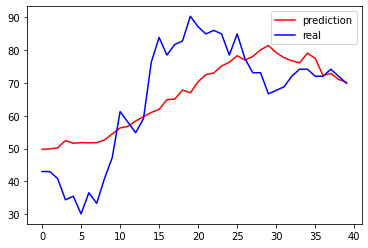

input_target_covariate_tensor shape: torch.Size([1000, 1, 5])
hidden shape: torch.Size([1, 1, 50])
next_covariate_tensor: torch.Size([1, 1, 160])


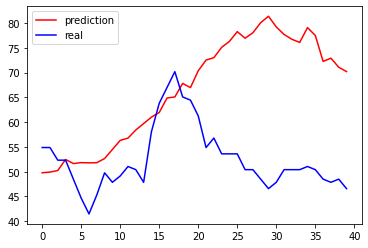

input_target_covariate_tensor shape: torch.Size([1000, 1, 5])
hidden shape: torch.Size([1, 1, 50])
next_covariate_tensor: torch.Size([1, 1, 160])


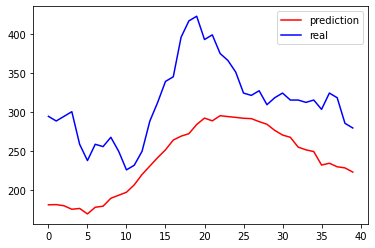

input_target_covariate_tensor shape: torch.Size([1000, 1, 5])
hidden shape: torch.Size([1, 1, 50])
next_covariate_tensor: torch.Size([1, 1, 160])


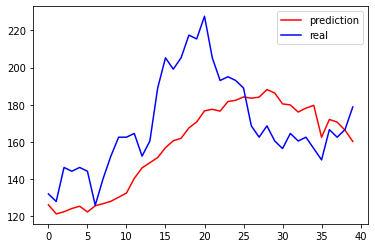

input_target_covariate_tensor shape: torch.Size([1000, 1, 5])
hidden shape: torch.Size([1, 1, 50])
next_covariate_tensor: torch.Size([1, 1, 160])


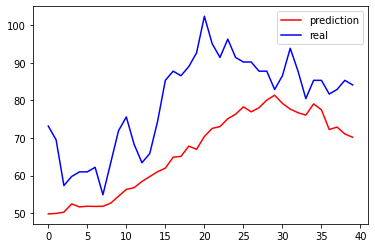

In [ ]:
import matplotlib.pyplot as plt
for mat in ['MT_010' ,'MT_014' , 'MT_006' , 'MT_004' , 'MT_005']:
  predict_result = net.predict(train_y,train_x,test_x,mat )
  res = pd.Series(predict_result[0.5])
  res.loc[res==0]=np.nan
  plt.plot(res.interpolate(), color = 'r', label='prediction')
  plt.plot(test_y[mat].to_list(), color= 'b', label='real')
  plt.legend()
  plt.show()